# Extract image content with Azure AI Chat-GPT4o


## Requirements

* [Azure OpenAI Service](https://azure.microsoft.com/en-us/products/ai-services/openai-service)
  * GPT-4o
* Python environment, version 3.10 or higher
* GitHub CodeSpaces
* Visual Studio Code
  * Extensions: Python and Jupyper

In [1]:
# Python packages
# ! pip install -r requirements.txt

In [1]:
# Libraries
import os
from dotenv import load_dotenv

# Import Utility Functions
from utils import (
    display_image,
    word_wrap,
    local_image_to_data_url    
)

# OpenAI Python libraries
from openai import AzureOpenAI

In [3]:
#load variables
load_dotenv()

# Variables - Azure Services
AZURE_OPENAI_ACCOUNT=os.environ["AZURE_OPENAI_ACCOUNT"]
AZURE_OPENAI_KEY=os.environ["AZURE_OPENAI_KEY"]

# Variables - Names
azure_openai_gpt4o_name="gpt-4o"

## Azure OpenAI Call


### AzureOpenAI call using a local image

In [4]:
# Create an OpenAI client object
# Python AzureOpenAI Class: https://github.com/openai/openai-python?tab=readme-ov-file#microsoft-azure-openai
openai_client=AzureOpenAI(
     api_version="2024-06-01",
     azure_endpoint=AZURE_OPENAI_ACCOUNT,     
     api_key=AZURE_OPENAI_KEY
)

### AzureOpenAI call using a a Local Image

1. First convert the image file to base64 so it can be passed to the API
1. Send the base64 file to Azure OpenAI API using the image_url field. 

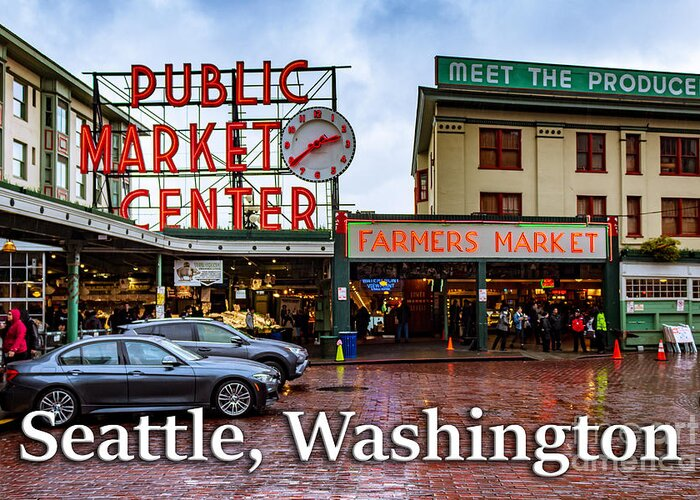

In [ ]:
# Display the image
# Test images path: ""../images-lab-tests/"
display_image("../images-lab-tests/seattle-pikeplace-1.jpg")

In [5]:
# Add and test local image 1
image_path='../images-lab-tests/seattle-pikeplace-1.jpg'
data_url=local_image_to_data_url(image_path)
#print("Data URL:", data_url)

In [6]:
response=openai_client.chat.completions.create(
    model=azure_openai_gpt4o_name,
    messages=[
        { 
            "role": "system", 
            "content": "You are a Visual Cognitive system tasked with extracting text and information from images." 
        },
        { 
            "role": "user", 
            "content": [  
                { 
                    "type": "text", 
                    "text": "Extract all the following data in different sections from the provided \
                        image and compile it into a paragraph: Brief description, Entities, and Text in the image."
                    
                },
                { 
                    "type": "image_url",
                    "image_url": {
                        "url": data_url                        
                    }
                }
            ] 
        } 
    ],
    #  Set a "max_tokens" value, or the return output will be cut off
    max_tokens=3000 
)

print(f"Azure OpenAI message content only:\n{word_wrap(response.choices[0].message.content)}")

Azure OpenAI message content only:
**Brief Description:**  
The image depicts the iconic Pike Place Market in Seattle, Washington, a
bustling and historic marketplace known for its vibrant atmosphere and local vendors. The scene
features wet, reflective brick pavement, parked cars, and people walking under overcast skies,
adding to the character of the urban setting.

**Entities:**  
- Location: Seattle, Washington  
-
Landmark: Pike Place Market  
- Key Features: Public Market Center sign, Farmers Market sign, "Meet
the Producers" text on the building, a clock on the signage, people, cars, and storefronts.

**Text
in the Image:**  
- PUBLIC MARKET CENTER  
- FARMERS MARKET  
- MEET THE PRODUCERS  
- Seattle,
Washington  

**Compiled Paragraph:**  
This image showcases the famous Pike Place Market in
Seattle, Washington, under a cloudy sky with reflective, wet brick pavement. The main focus is the
"Public Market Center" sign with its red lettering and iconic clock, flanked by a "Farmer

### AzureOpenAI call using a URL

In [7]:
# Add the image URL
url = 'https://learn.microsoft.com/azure/ai-services/computer-vision/media/quickstarts/presentation.png'

In [8]:
#query="Extract all the text from the provided image and compile it into a paragraph."

response=openai_client.chat.completions.create(
    model=azure_openai_gpt4o_name,
    messages=[
        { 
            "role": "system", 
            "content": "You are a Visual Cognitive system tasked with extracting text and information from images." 
        },
        { 
            "role": "user", 
            "content": [  
                { 
                    "type": "text", 
                    "text": "Using the image provided by image_url, get the following information: \
                        Brief description, Tags, and Text in the image."
                    
                },
                { 
                    "type": "image_url",
                    "image_url": {
                        "url": url                        
                    }
                }
            ] 
        } 
    ],
    #  Set a "max_tokens" value, or the return output will be cut off
    max_tokens=3000 
)

print(f"Azure OpenAI message content only:\n{word_wrap(response.choices[0].message.content)}")

Azure OpenAI message content only:
**Brief Description:**  
The image depicts an interactive meeting or collaboration setup featuring
a person using a smart touchscreen display. The screen shows a calendar interface for scheduling
and joining meetings in a professional environment.

**Tags:**  
Technology, Interactive Display,
Collaboration, Smart Screen, Meeting Schedule, Office, Workspace, User Interaction.

**Text in the
Image:**  
_Upper left corner:_  
- **9:35 AM**  
- Conference room | 54684554  
- 555-123-4567 


_Overlay on the right panel (Meeting schedule details):_  
- **Town Hall**  
  9:00 AM - 10:00 AM
 
  Aaron Buxton  
  [Join]  

- **Daily SCRUM**  
  10:00 AM - 10:30 AM  
  Charlotte De Coutun 


- **Quarterly All-Hands**  
  11:00 AM - 12:00 PM  
  Satish Sharma  

- **Weekly stand-up**  
 
12:00 PM - 12:30 PM  
  Danielle Marcario  

- **Product review**  

_Horizontal navigation buttons
(icons):_  
- Call, Chat, Email, Whiteboard, Share, More.


## Group Discussion

### Analyze another image

Try using an image from the [images-lab-tests](../images-lab-tests/) folder

In [ ]:
# Display the image - Optional
# Test images path: ""../images-lab-tests/"
display_image("../images-lab-tests/<REPLACE_WITH_IMAGE_FILE-NAME>")

In [ ]:
# Add and test local image
image_path='../images-lab-tests/<REPLACE_WITH_IMAGE_FILE>'
data_url=local_image_to_data_url(image_path)

In [ ]:
response=openai_client.chat.completions.create(
    model=azure_openai_gpt4o_name,
    messages=[
        { 
            "role": "system", 
            "content": "You are a Visual Cognitive system tasked with extracting text and information from images." 
        },
        { 
            "role": "user", 
            "content": [  
                { 
                    "type": "text", 
                    "text": "Extract all the following data in different sections from the provided \
                        image and compile it into a paragraph: Brief description, Entities, and Text in the image."
                    
                },
                { 
                    "type": "image_url",
                    "image_url": {
                        "url": data_url                        
                    }
                }
            ] 
        } 
    ],
    #  Set a "max_tokens" value, or the return output will be cut off
    max_tokens=3000 
)

print(f"Azure OpenAI message content only:\n{word_wrap(response.choices[0].message.content)}")

In [ ]:
# OPTIONAL - ADD AND TEST YOUR OWN CODE IN THIS CODE BOX


In [ ]:
# OPTIONAL - ADD AND TEST YOUR OWN CODE IN THIS CODE BOX


In [ ]:
# OPTIONAL - ADD AND TEST YOUR OWN CODE IN THIS CODE BOX


### Try to answer the following questions

* What output formats would you use in a real production application?
* In which Azure service would you host this code?
* What is the difference between OCR, Image Analysis and GPT-4o?